# 📝 Introductory exercise for sample grouping

This exercise aims at highlighting issues that one could encounter when
discarding grouping pattern existing in a dataset.

We will use the digits dataset which includes some grouping pattern.

In [1]:
from sklearn.datasets import load_digits

data, target = load_digits(return_X_y=True, as_frame=True)

The first step is to create a model. Use a machine learning pipeline
composed of a scaler followed by a logistic regression classifier.

In [5]:
# Write your code here.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

Then, create a a `KFold` object making sure that the data will not be
shuffled during the cross-validation. Use the previous model, data, and
cross-validation strategy defined to estimate the statistical performance of
the model.

Accuracy in CV's: 
 [0.89444444 0.97777778 0.89444444 0.93888889 0.95555556 0.96666667
 0.96111111 0.96648045 0.88268156 0.94413408]

MSE in  CV's: 
 [1.77777778 0.86666667 1.28333333 1.42777778 1.04444444 0.68333333
 0.92777778 0.12849162 3.98882682 0.8603352 ]

Mean Accuracy:  0.9382184978274364
Mean MSE:  1.2988764742396028


Text(0.5, 0.98, 'RESULTS')

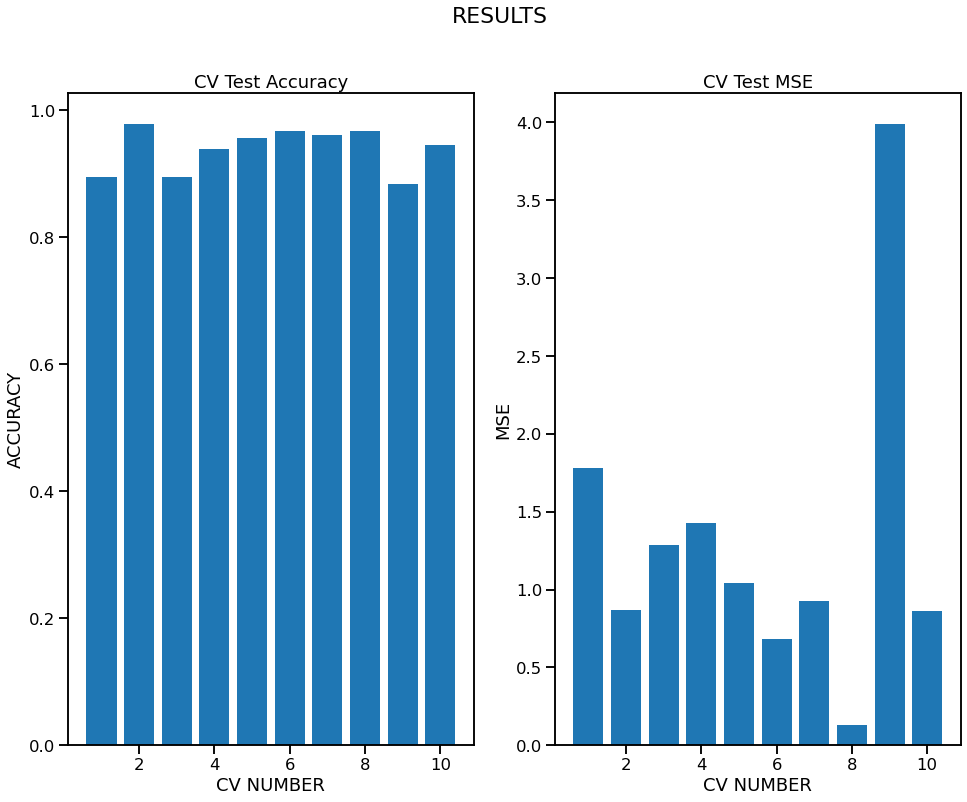

In [48]:
# Write your code here.
#USING KFOLD AS DEFAULT NO SHUFFLING
from sklearn.model_selection import cross_validate, KFold
import matplotlib.pyplot as plt

cv = KFold(n_splits=10)
results = cross_validate(model, data, target, cv=cv, 
                         scoring=["neg_mean_squared_error", "accuracy"])
results["test_neg_mean_squared_error"] = -results["test_neg_mean_squared_error"]

print("Accuracy in CV's: \n", results["test_accuracy"])
print("\nMSE in  CV's: \n", results["test_neg_mean_squared_error"])

print("\nMean Accuracy: ", results["test_accuracy"].mean())
print("Mean MSE: ", results["test_neg_mean_squared_error"].mean())

plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.bar(x=list(range(1,11)), height=results["test_accuracy"])
plt.xlabel("CV NUMBER")
plt.ylabel("ACCURACY")
plt.title("CV Test Accuracy")
plt.subplot(1,2,2)
plt.bar(x=list(range(1,11)), height=results["test_neg_mean_squared_error"])
plt.xlabel("CV NUMBER")
plt.ylabel("MSE")
plt.title("CV Test MSE")
plt.suptitle("RESULTS")

Finally, perform the same experiment by shuffling the data within the
cross-validation. Draw some conclusion regarding the dataset.

Accuracy in CV's: 
 [0.96666667 0.97222222 0.98888889 0.96111111 0.96111111 0.96111111
 0.98888889 0.94972067 0.98324022 0.95530726]

MSE in  CV's: 
 [0.77777778 0.75555556 0.09444444 0.93888889 1.06666667 0.98333333
 0.27777778 0.4972067  0.18435754 0.97765363]

Mean Accuracy:  0.9688268156424581
Mean MSE:  0.6553662321539415


Text(0.5, 0.98, 'RESULTS')

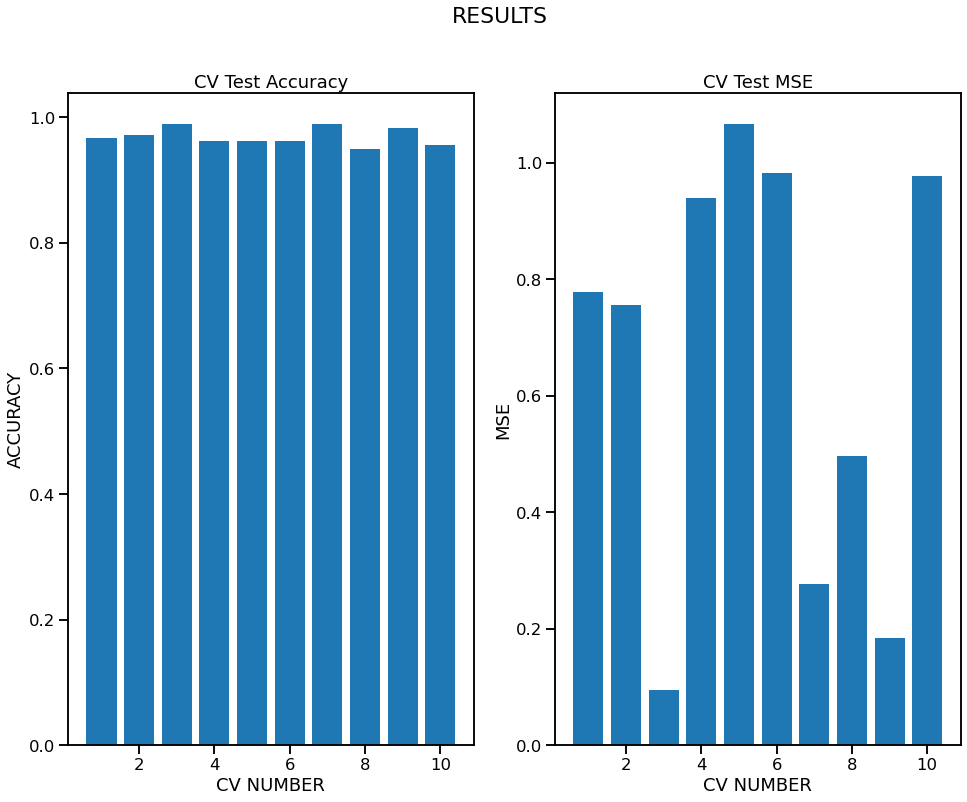

In [50]:
# Write your code here.
# USING KFOLD WITH SHUFFLE
from sklearn.model_selection import cross_validate, KFold

cv = KFold(n_splits=10, shuffle=True)
results = cross_validate(model, data, target, cv=cv, 
                         scoring=["neg_mean_squared_error", "accuracy"])
results["test_neg_mean_squared_error"] = -results["test_neg_mean_squared_error"]

print("Accuracy in CV's: \n", results["test_accuracy"])
print("\nMSE in  CV's: \n", results["test_neg_mean_squared_error"])

print("\nMean Accuracy: ", results["test_accuracy"].mean())
print("Mean MSE: ", results["test_neg_mean_squared_error"].mean())

plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.bar(x=list(range(1,11)), height=results["test_accuracy"])
plt.xlabel("CV NUMBER")
plt.ylabel("ACCURACY")
plt.title("CV Test Accuracy")
plt.subplot(1,2,2)
plt.bar(x=list(range(1,11)), height=results["test_neg_mean_squared_error"])
plt.xlabel("CV NUMBER")
plt.ylabel("MSE")
plt.title("CV Test MSE")
plt.suptitle("RESULTS")

Accuracy in CV's: 
 [0.96111111 0.97222222 0.96111111 0.96666667 0.98333333 0.97222222
 0.97777778 0.97206704 0.98324022 0.97765363]

MSE in  CV's: 
 [0.70555556 0.30555556 1.42777778 1.11666667 0.36666667 0.60555556
 0.47222222 0.32402235 0.26815642 0.27374302]

Mean Accuracy:  0.9727405338299192
Mean MSE:  0.5865921787709496


Text(0.5, 0.98, 'RESULTS')

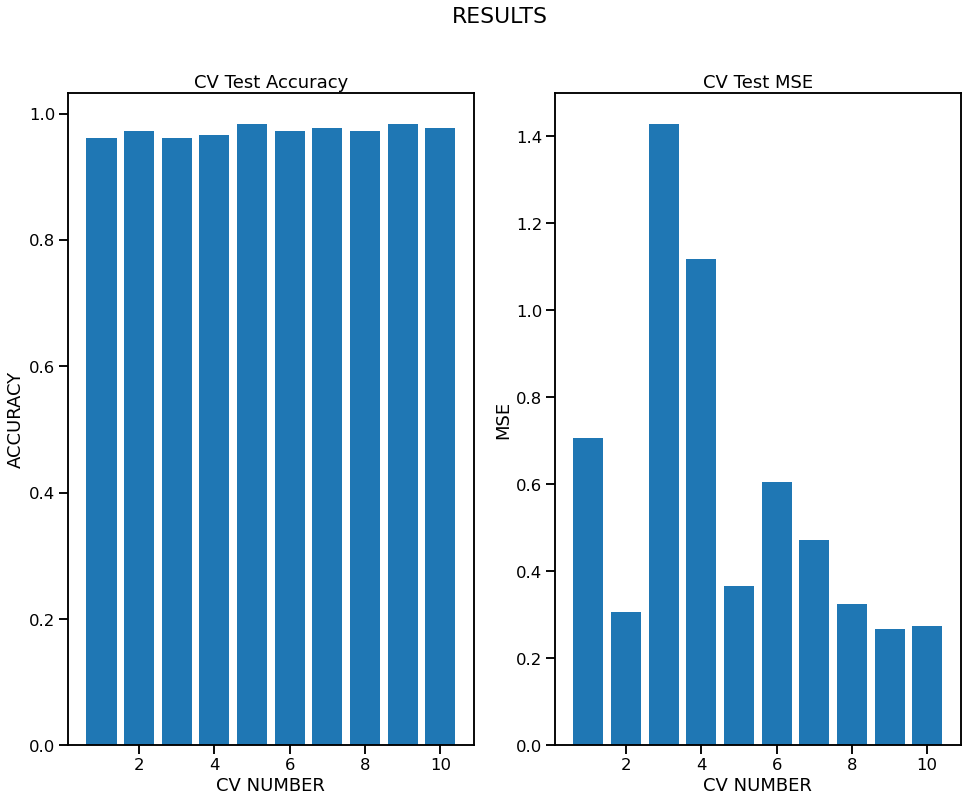

In [52]:
# Write your code here.
#USING KFOLD WITH STRATIFICATION
from sklearn.model_selection import cross_validate, StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_validate(model, data, target, cv=cv, 
                         scoring=["neg_mean_squared_error", "accuracy"])
results["test_neg_mean_squared_error"] = -results["test_neg_mean_squared_error"]

print("Accuracy in CV's: \n", results["test_accuracy"])
print("\nMSE in  CV's: \n", results["test_neg_mean_squared_error"])

print("\nMean Accuracy: ", results["test_accuracy"].mean())
print("Mean MSE: ", results["test_neg_mean_squared_error"].mean())

plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.bar(x=list(range(1,11)), height=results["test_accuracy"])
plt.xlabel("CV NUMBER")
plt.ylabel("ACCURACY")
plt.title("CV Test Accuracy")
plt.subplot(1,2,2)
plt.bar(x=list(range(1,11)), height=results["test_neg_mean_squared_error"])
plt.xlabel("CV NUMBER")
plt.ylabel("MSE")
plt.title("CV Test MSE")
plt.suptitle("RESULTS")